In [0]:
#this will upload your files
#upload data tar

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving tub_data.tar to tub_data.tar
User uploaded file "tub_data.tar" with length 16317440 bytes


In [0]:
!tar -xf tub_data.tar

In [0]:
ls

sample_data/


In [0]:
import re

def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower() 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)

In [0]:
import json
from glob import iglob
from pprint import pprint
from matplotlib import pyplot as plt
%matplotlib inline

steering = []
for path in natural_sort(iglob('tub/*.json')):
  if not path == 'tub/meta.json':
    with open(path) as f:
        data = json.load(f)
        #pprint(data['user/angle'])
        steering.append(data['user/angle'])

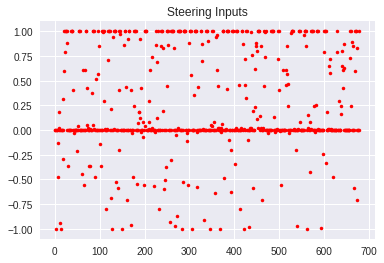

In [0]:
plt.title("Steering Inputs")
plt.plot(steering[0:3400:5], '.r')

In [0]:
from keras.layers import Input, Dense, merge
from keras.models import Model
from keras.layers import Convolution2D, MaxPooling2D, Reshape, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense

def default_linear():
    img_in = Input(shape=(120, 160, 3), name='img_in')
    x = img_in

    # Convolution2D class name is an alias for Conv2D
    x = Convolution2D(filters=24, kernel_size=(5, 5), strides=(2, 2), activation='relu')(x)
    x = Convolution2D(filters=32, kernel_size=(5, 5), strides=(2, 2), activation='relu')(x)
    x = Convolution2D(filters=64, kernel_size=(5, 5), strides=(2, 2), activation='relu')(x)
    x = Convolution2D(filters=64, kernel_size=(3, 3), strides=(2, 2), activation='relu')(x)
    x = Convolution2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu')(x)

    x = Flatten(name='flattened')(x)
    x = Dense(units=100, activation='linear')(x)
    x = Dropout(rate=.1)(x)
    x = Dense(units=50, activation='linear')(x)
    x = Dropout(rate=.1)(x)
    # categorical output of the angle
    angle_out = Dense(units=1, activation='linear', name='angle_out')(x)

    # continous output of throttle
    throttle_out = Dense(units=1, activation='linear', name='throttle_out')(x)

    model = Model(inputs=[img_in], outputs=[angle_out, throttle_out])

    model.compile(optimizer='adam',
                  loss={'angle_out': 'mean_squared_error',
                        'throttle_out': 'mean_squared_error'},
                  loss_weights={'angle_out': 0.5, 'throttle_out': .5})

    return model

Using TensorFlow backend.


In [0]:
#this will upload your files
#upload model here

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving mypilot to mypilot
User uploaded file "mypilot" with length 3267552 bytes


In [0]:
model = default_linear()
#model.load_weights('donkeycar_model.h5')
model.load_weights('mypilot')

In [0]:
!pip install keras-vis

In [0]:
from vis.utils import utils
from keras.preprocessing.image import img_to_array
import numpy as np

FRAME_H = 120
FRAME_W = 160

preds = []
for path in natural_sort(iglob('tub/*.jpg')):
  img = utils.load_img(path, target_size=(FRAME_H, FRAME_W))
  bgr_img = utils.bgr2rgb(img)
  img_input = np.expand_dims(img_to_array(bgr_img), axis=0)
  pred = model.predict(img_input)[0][0]
  preds.extend(pred)

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


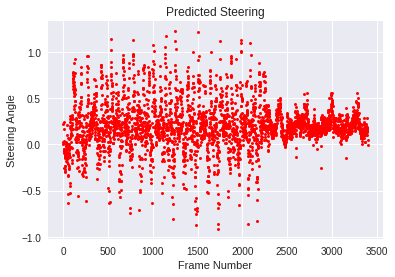

In [0]:
END_INDEX = 3400
STEP_SIZE = 1

#f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,  figsize=(30, 10))
#ax2.plot(range(0,END_INDEX,STEP_SIZE), preds[0:END_INDEX:STEP_SIZE], ".r", markersize=8)
#ax2.set_title("Predicted Steering")
#ax1.plot(range(0,END_INDEX,STEP_SIZE),steering[0:END_INDEX:STEP_SIZE], ".g", markersize=8)
#ax1.set_title("Steering Values")
#plt.tight_layout()

plt.figure()
plt.plot(range(0,END_INDEX,STEP_SIZE), preds[0:END_INDEX:STEP_SIZE], ".r", markersize=6)
plt.title("Predicted Steering")
#plt.title("Actual Steering")
plt.ylabel("Steering Angle")
plt.xlabel("Frame Number")
plt.savefig("PredictedSteering.png", dpi=1200)
#plt.figure()
#plt.plot(range(0,END_INDEX,STEP_SIZE), steering[0:END_INDEX:STEP_SIZE], ".g", markersize=6)
#plt.title("Actual Steering")
#plt.ylabel("Steering Angle")
#plt.xlabel("Frame Number")
#plt.savefig("ActualSteering.png", dpi=1200)

In [0]:
from google.colab import files
files.download("PredictedSteering.png")

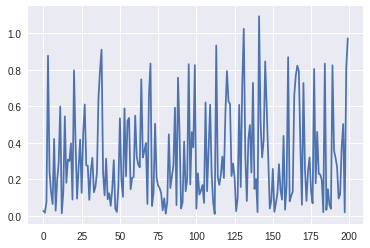

In [0]:
diff = []
for i in range(0, END_INDEX, STEP_SIZE):
  diff.append(abs(steering[i]-preds[i]))
plt.plot(diff)

In [0]:
def map_range(x, X_min, X_max, Y_min, Y_max):
    """
    Linear mapping between two ranges of values
    """
    X_range = X_max - X_min
    Y_range = Y_max - Y_min
    XY_ratio = X_range / Y_range

    y = ((x - X_min) / XY_ratio + Y_min) // 1

    return int(y)

In [0]:
print(map_range(0.90,-1, 1,290,490))

480


In [0]:
for i in range(-1, 1, 0.01):
  print(i)

TypeError: ignored